Primeras filas:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Resumen de valores nulos:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

Tipos de dato:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

Columnas numéricas que vamos a usar:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


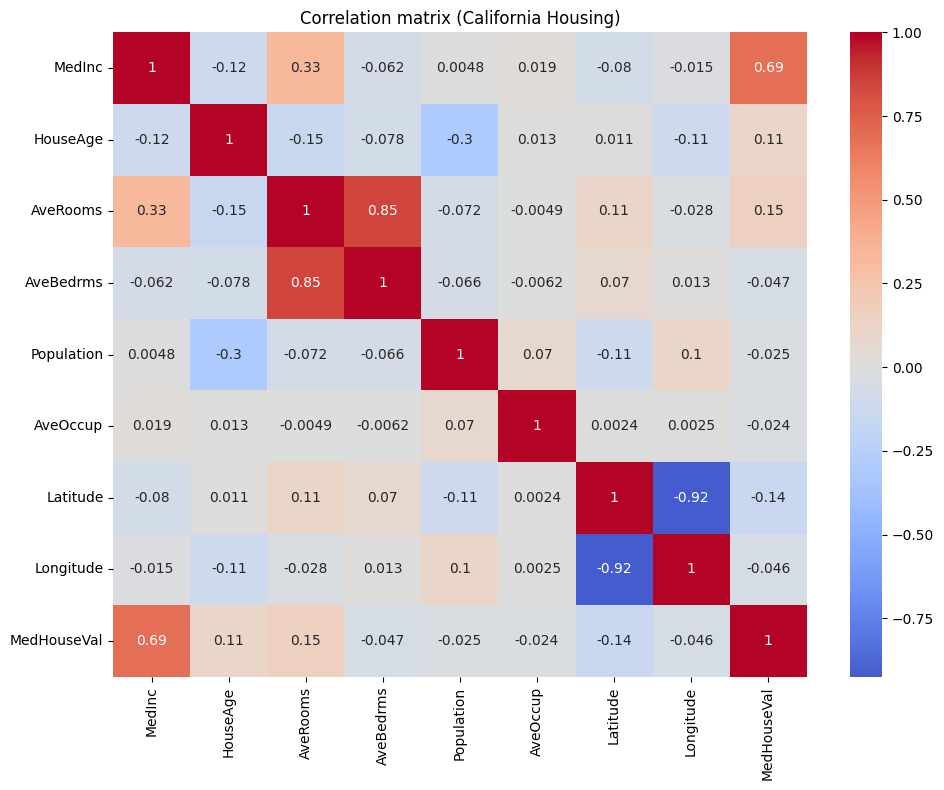


Shapes:
X_train: (14448, 8) X_test: (6192, 8)
y_train: (14448,) y_test: (6192,)

Mutual Information (ordenado):


,mutual_information
Longitude,0.386449
MedInc,0.382629
Latitude,0.365717
AveRooms,0.090700
AveOccup,0.075625
HouseAge,0.033384
Population,0.024280
AveBedrms,0.021542


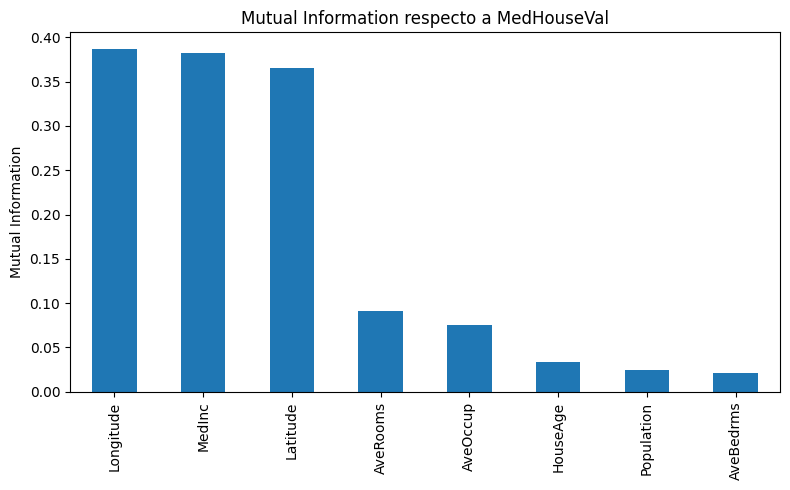


Top 5 features según MI:


,mutual_information
Longitude,0.386449
MedInc,0.382629
Latitude,0.365717
AveRooms,0.090700
AveOccup,0.075625


In [3]:
# -*- coding: utf-8 -*-
"""
Feature selection en California Housing (sklearn):
- Carga del dataset desde sklearn
- Matriz de correlación
- Mutual Information (MI) con respecto a MedHouseVal (target)
"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.datasets import fetch_california_housing

# ==========================
# 1. Cargar datos (California Housing desde sklearn)
# ==========================

california = fetch_california_housing()

# Convertimos a DataFrame
df = pd.DataFrame(california.data, columns=california.feature_names)
df["MedHouseVal"] = california.target  # target

print("Primeras filas:")
display(df.head())

print("\nResumen de valores nulos:")
print(df.isnull().sum())

print("\nTipos de dato:")
print(df.dtypes)

# En este dataset NO hay NA y todas las columnas ya son numéricas

# ==========================
# 2. Nos quedamos con todas las columnas numéricas
# ==========================

# (Todas son numéricas, no hay que eliminar nada)
df_num = df.copy()

print("\nColumnas numéricas que vamos a usar:")
print(df_num.columns.tolist())

# ==========================
# 3. Matriz de correlación
# ==========================

plt.figure(figsize=(10,8))
corr_mat = df_num.corr(numeric_only=True)
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation matrix (California Housing)")
plt.tight_layout()
plt.show()

# ==========================
# 4. Definir X, y y hacer train/test split
# ==========================

target_col = "MedHouseVal"
y = df_num[target_col]
X = df_num.drop(columns=[target_col])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("\nShapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

# ==========================
# 5. Mutual Information (MI)
# ==========================

mi_scores = mutual_info_regression(X_train, y_train, random_state=42)

mi_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

print("\nMutual Information (ordenado):")
display(mi_series.to_frame(name="mutual_information"))

# ==========================
# 6. Gráfica de MI
# ==========================

plt.figure(figsize=(8,5))
mi_series.plot(kind="bar")
plt.ylabel("Mutual Information")
plt.title("Mutual Information respecto a MedHouseVal")
plt.tight_layout()
plt.show()

# ==========================
# 7. Top k features (ejemplo)
# ==========================

k = 5
top_k = mi_series.head(k)
print(f"\nTop {k} features según MI:")
display(top_k.to_frame("mutual_information"))
